<a href="https://colab.research.google.com/github/AzadMahmud/AI-Lab/blob/main/custom_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving my_dataset.npz to my_dataset (1).npz


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder


In [6]:


data    = np.load("/content/my_dataset.npz")
X_train = data['x_train']
X_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']
print( X_train.shape)



(2084, 28, 28, 1)


In [7]:


inputs = Input((28,28))
x = Flatten()(inputs)
x1 = Dense(128, activation="relu")(x)
x2 = Dense(256, activation="relu")(x1)
x3 = Dense(128,  activation="relu")(x2)
x4 = Dense(64,  activation="relu")(x3)
x5 = Dense(32,  activation="relu")(x4)
outputs = Dense(10, activation="softmax")(x5)
model = Model(inputs, outputs)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,066 (691.66 KB)

 Trainable params: 177,066 (691.66 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:


model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)



In [12]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6760 - loss: 0.9451 - val_accuracy: 0.4713 - val_loss: 2.2486
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6864 - loss: 0.9390 - val_accuracy: 0.5172 - val_loss: 1.8970
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7523 - loss: 0.6943 - val_accuracy: 0.4674 - val_loss: 2.6698
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7300 - loss: 0.7719 - val_accuracy: 0.5307 - val_loss: 2.2976
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7685 - loss: 0.6769 - val_accuracy: 0.5057 - val_loss: 2.9472
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7805 - loss: 0.6877 - val_accuracy: 0.5268 - val_loss: 2.0036
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7258 - loss: 0.8225 - val_accuracy: 0.5345 - val_loss: 2.0028
Epoch 8/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7598 - loss: 0.6626 - val_accuracy: 0.5326 - v

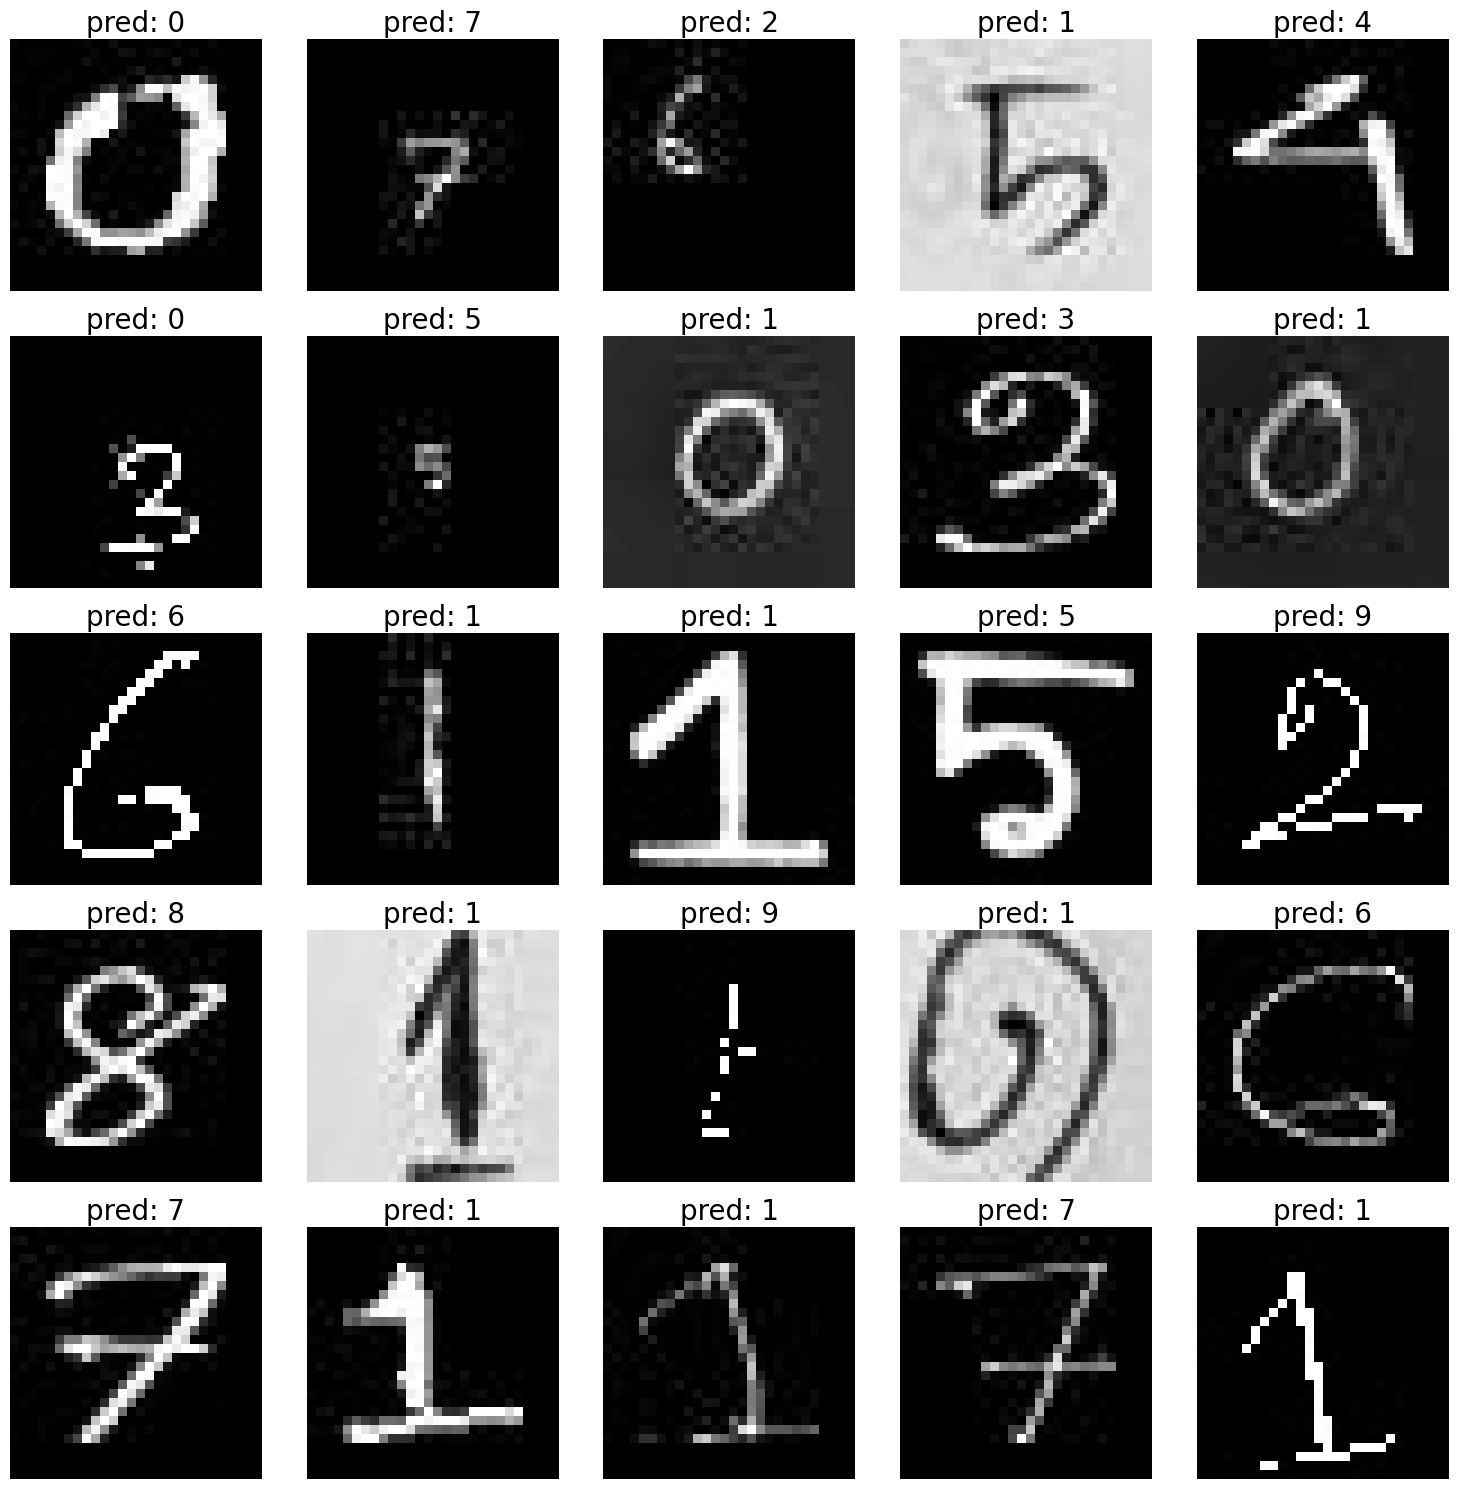

In [13]:
plt.figure(figsize=(15,15))
n_show = min(25, len(X_test))

rows, cols = 5, 5

for i in range(n_show):
    plt.subplot(rows, cols, i+1)
    sample = X_test[i].reshape(1, 28, 28, 1)

    pred = model.predict(sample, verbose=0).argmax(axis=1)[0]
    plt.title(f"pred: {pred}", fontsize=20)

    plt.imshow(X_test[i], cmap="gray")
    plt.axis('off')

plt.tight_layout()

plt.show()